### Import package

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import random
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.semi_supervised import LabelSpreading,LabelPropagation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis,LinearDiscriminantAnalysis
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC,NuSVC
from sklearn.linear_model import RidgeClassifierCV,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.dummy import DummyClassifier
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
import os
from sklearn.feature_selection import SelectKBest,chi2
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from skmultilearn.problem_transform import BinaryRelevance,ClassifierChain, LabelPowerset
from skmultilearn.adapt import MLkNN
from skmultilearn.cluster import LabelCooccurrenceGraphBuilder
from skmultilearn.ensemble import LabelSpacePartitioningClassifier
from skmultilearn.cluster.networkx import NetworkXLabelGraphClusterer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import MultiLabelBinarizer
import nltk
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
import string
import collections
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import LancasterStemmer
from skmultilearn.ensemble import MajorityVotingClassifier
from skmultilearn.cluster import FixedLabelSpaceClusterer
from skmultilearn.adapt import BRkNNaClassifier,BRkNNbClassifier
from sklearn.multioutput import RegressorChain
from mlxtend.classifier import StackingClassifier
import joblib
import ipyparallel as ipp

### Import dataset

In [2]:
filpkart_watch=pd.read_csv('flipkart_watch.csv')
filpkart_tablet=pd.read_csv('flipkart_tablet.csv')
filpkart_laptop=pd.read_csv('flipkart_laptop.csv')
filpkart_phone=pd.read_csv('flipkart_phone.csv')
filpkart_TV=pd.read_csv('flipkart_TV.csv')
amazon_watch=pd.read_csv('amazon_watch.csv')
amazon_tablet=pd.read_csv('amazon_power_bank.csv')
amazon_earphone=pd.read_csv('amazon_earphone.csv')
amazon_phone=pd.read_csv('amazon_phone.csv')
amazon_TV=pd.read_csv('amazon_TV.csv')
dataa = pd.concat([filpkart_watch,filpkart_tablet,filpkart_laptop,filpkart_TV,filpkart_phone,
                  amazon_watch,amazon_tablet,amazon_earphone,amazon_TV,amazon_phone], axis=0)
dataa

,comments,rating
0,Terrific purchase,5
1,Highly recommended,5
2,Just wow!,5
3,Worth every penny,5
4,Must buy!,5
...,...,...
12495,Selfie camera is very poor,1
12496,Review after 1 month,1
12497,Charger USB cable not working,1
12498,Disoppointed with product quality,1


In [3]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125000 entries, 0 to 12499
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   comments  124984 non-null  object
 1   rating    125000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.9+ MB


In [4]:
dataa[dataa['comments'].isna()]

,comments,rating
4997,NaN,4
5187,NaN,3
11516,NaN,1
2257,NaN,5
4035,NaN,4
5197,NaN,3
6165,NaN,3
7024,NaN,3
10720,NaN,1
3087,NaN,4


In [5]:
data=dataa[dataa['comments'].notna()].reset_index(drop=True)
data

,comments,rating
0,Terrific purchase,5
1,Highly recommended,5
2,Just wow!,5
3,Worth every penny,5
4,Must buy!,5
...,...,...
124979,Selfie camera is very poor,1
124980,Review after 1 month,1
124981,Charger USB cable not working,1
124982,Disoppointed with product quality,1


### Data Pre-processing

In [6]:
def remove_least(df,rating):
    dato=df[df['rating']==rating].reset_index(drop=True)
    listy=[]
    for i in dato['comments']:     ###combine all words
        listy.extend(i.split())
    dic = {}
    for raw_word in listy:         ### bag of words
        word = raw_word.lower()
        if word in dic:
            dic[word] += 1
        else:
            dic[word] = 1
    filtery= dict((k, v) for k, v in dic.items() if v < 20) ### filter
    for i in range(len(dato)):
        dato['comments'].iloc[i]=' '.join([j for j in dato['comments'].iloc[i].split() if j not in filtery])
    return dato

In [7]:
def preprocess_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", elem))  
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"\d+", "", elem))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([wnl.lemmatize(word) for word in elem.split()]))
    df[text_field] = df[text_field].apply(lambda elem: ' '.join([word for word in elem.split() if len(word)>2 if word not in (stop)]))
    return df

In [8]:
wnl = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
stop.remove('not')
stop.append('product')
data=preprocess_text(data,'comments')
data

,comments,rating
0,terrific purchase,5
1,highly recommended,5
2,wow,5
3,worth every penny,5
4,must buy,5
...,...,...
124979,selfie camera poor,1
124980,review month,1
124981,charger usb cable not working,1
124982,disoppointed quality,1


In [ ]:
data=pd.concat([remove_least(data,1),remove_least(data,2),remove_least(data,3),remove_least(data,4),remove_least(data,5)],
               axis=0)
data

### EDA

In [9]:
print('Dataset contains '+str(data.shape[0])+' rows & '+str(data.shape[1])+' columns')

Dataset contains 124984 rows & 2 columns


<AxesSubplot:xlabel='comments'>

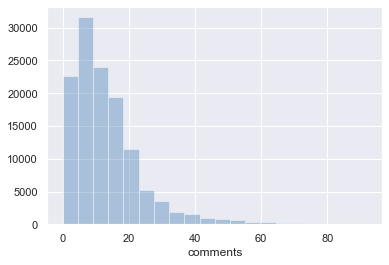

In [10]:
sn.set(color_codes=True)
comment_len = data.comments.str.len()
sn.distplot(comment_len, kde=False, bins=20, color="steelblue")

In [11]:
print('Datapoints of 5 rating:',data[data['rating']==5].shape[0])
print('Datapoints of 4 rating:',data[data['rating']==4].shape[0])
print('Datapoints of 3 rating:',data[data['rating']==3].shape[0])
print('Datapoints of 2 rating:',data[data['rating']==2].shape[0])
print('Datapoints of 1 rating:',data[data['rating']==1].shape[0])

Datapoints of 5 rating: 24998
Datapoints of 4 rating: 24997
Datapoints of 3 rating: 24993
Datapoints of 2 rating: 24999
Datapoints of 1 rating: 24997


### Visualizing most frequent words w.r.t each labels

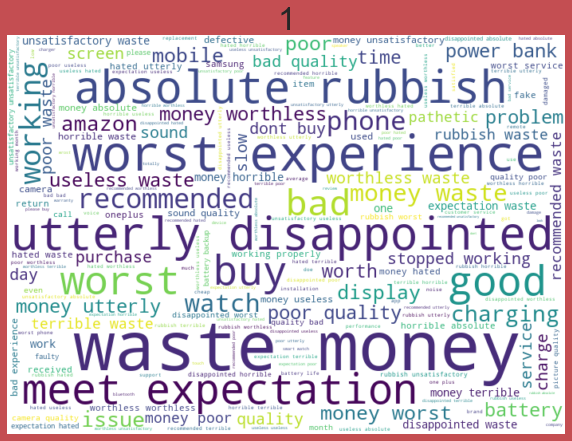

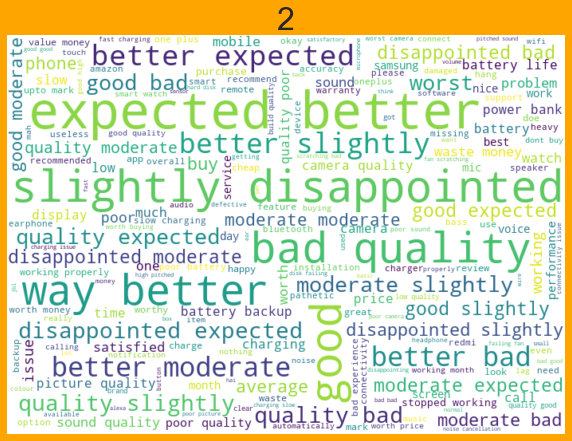

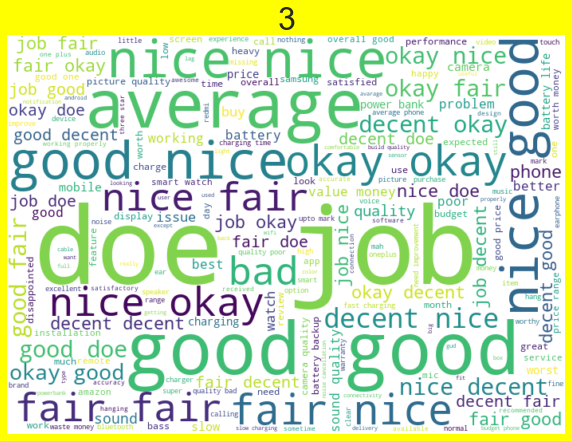

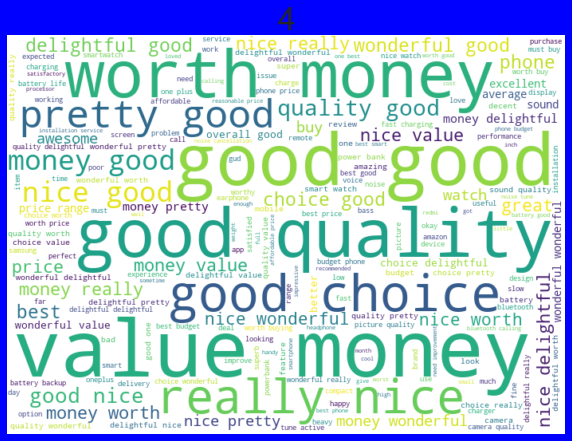

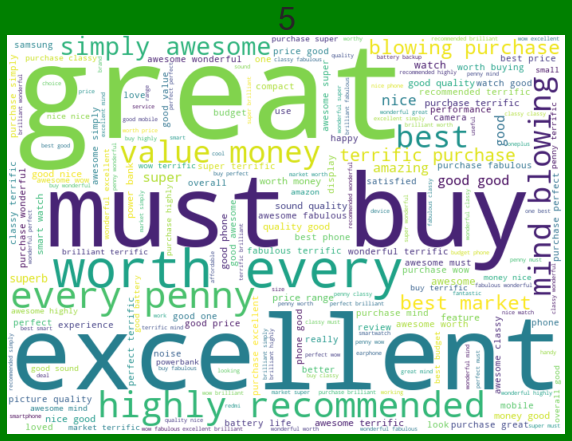

In [12]:
plt.figure(figsize = (10,8),facecolor='r')
dat=data['comments'][data['rating']==1]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(1, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='orange')
dat=data['comments'][data['rating']==2]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(2, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='yellow')
dat=data['comments'][data['rating']==3]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(3, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='blue')
dat=data['comments'][data['rating']==4]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(4, fontsize = 32)
plt.axis("off")
plt.show()
plt.figure(figsize = (10,8),facecolor='green')
dat=data['comments'][data['rating']==5]
wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
plt.imshow(wordC, interpolation='bilinear')
plt.title(5, fontsize = 32)
plt.axis("off")
plt.show()

#### Sampling the data for fast computing

In [13]:
def sample_data(df):
    skip = sorted(random.sample(range(1, df.shape[0]), df.shape[0]-10000))
    sampledf=df.copy()
    sampledf.drop(skip,axis=0,inplace=True)
    return sampledf

In [14]:
sampled=pd.concat([sample_data(data[data['rating']==1].reset_index(drop=True)),
                   sample_data(data[data['rating']==2].reset_index(drop=True)),
                   sample_data(data[data['rating']==3].reset_index(drop=True)),
                   sample_data(data[data['rating']==4].reset_index(drop=True)),
                   sample_data(data[data['rating']==5].reset_index(drop=True))],
               axis=0)
sampled

,comments,rating
0,waste money,1
1,poor,1
4,terrible,1
7,absolute rubbish,1
8,hated,1
...,...,...
24986,best phone collection,5
24989,good bugdet mobile,5
24991,best mobile,5
24994,smooth software experience,5


In [15]:
print('Sampled Datapoints of 5 rating:',sampled[sampled['rating']==5].shape[0])
print('Sampled Datapoints of 4 rating:',sampled[sampled['rating']==4].shape[0])
print('Sampled Datapoints of 3 rating:',sampled[sampled['rating']==3].shape[0])
print('Sampled Datapoints of 2 rating:',sampled[sampled['rating']==2].shape[0])
print('Sampled Datapoints of 1 rating:',sampled[sampled['rating']==1].shape[0])

Sampled Datapoints of 5 rating: 10000
Sampled Datapoints of 4 rating: 10000
Sampled Datapoints of 3 rating: 10000
Sampled Datapoints of 2 rating: 10000
Sampled Datapoints of 1 rating: 10000


### Data transformation

##### Encoding strings to numbers

In [16]:
tf_vec = TfidfVectorizer(max_features = 1000, stop_words='english')
tf_vec.fit(data['comments'])
x= tf_vec.transform(data['comments'])
xs=tf_vec.transform(sampled['comments'])
ys=sampled.drop(['comments'],axis=1)
y=data.drop(['comments'],axis=1)

#### Spilting data

In [17]:
iter_model=[]
model_scores=[]
model_ham=[]
model_roc=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 42,test_size=0.20)

### Best random state

In [18]:
def besttrain(model,x,y):
    random=0
    score=0
    for i in range(43,100,2):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = i,test_size=0.20)
        model.fit(x_train,y_train)
        tmp=accuracy_score(y_test,model.predict(x_test))
        #print(i,tmp)
        if tmp>score:
            score=tmp
            random=i
    print("maximum accuracy_score is at random state :",random," and it is :",score)

### Model Building & Evaluation

In [19]:
models=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),SVC(),
        RidgeClassifier(),BaggingClassifier(),GradientBoostingClassifier(),SGDClassifier(),LGBMClassifier(),XGBClassifier(),
        ExtraTreesClassifier(),AdaBoostClassifier(),CalibratedClassifierCV(),LinearSVC(),RidgeClassifierCV()]

In [20]:
for i in models:
    scores=cross_val_score(i,x_train,y_train,cv=5,n_jobs=-1)
    score=np.mean(scores)
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print('score',score)
    print('Acc score',accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print('*'*10)
    model_scores.append(accuracy_score(y_test,y_pred))
    model_ham.append(score)
    iter_model.append(str(i))

LogisticRegression()
score 0.649544459871801
Acc score 0.6530383646037524
[[3813  498  315  170  154]
 [ 709 2829  600  706  130]
 [ 291  513 2988 1008  204]
 [ 115  246  852 3315  549]
 [  71  127  406 1009 3379]]
**********
DecisionTreeClassifier()
score 0.6562453139848164
Acc score 0.6680401648197783
[[3849  408  356  174  163]
 [ 621 3094  503  630  126]
 [ 337  402 3103  979  183]
 [ 141  235  837 3336  528]
 [  91  146  422 1016 3317]]
**********
KNeighborsClassifier()
score 0.6283317180045254
Acc score 0.6376765211825419
[[3691  693  245  171  150]
 [ 675 3148  376  636  139]
 [ 380  719 2789  958  158]
 [ 182  474  723 2951  747]
 [ 132  327  358  814 3361]]
**********
RandomForestClassifier()
score 0.6651164561372875
Acc score 0.6739208705044606
[[3903  387  335  173  152]
 [ 617 3081  527  613  136]
 [ 319  377 3120  983  205]
 [ 123  205  844 3329  576]
 [  81  132  414  952 3413]]
**********
SVC()
score 0.6627061425950567
Acc score 0.669560347241669
[[3887  451  331  149  1

In [21]:
stack = StackingClassifier(classifiers=[SVC(),ExtraTreesClassifier(), BaggingClassifier()], 
                          meta_classifier=RandomForestClassifier())
stack.fit(x_train,y_train)
scores=cross_val_score(i,x_train,y_train,cv=5,n_jobs=-1)
score=np.mean(scores)
y_pred=stack.predict(x_test)
print('Stack Classifier')
print('score',score)
print('Acc score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('*'*10)
model_scores.append(accuracy_score(y_test,y_pred))
model_ham.append(score)
iter_model.append('Stack Classifier')

Stack Classifier
score 0.6478542248383963
Acc score 0.676561187342481
[[3956  347  330  178  139]
 [ 656 3079  506  618  115]
 [ 322  380 3127  991  184]
 [ 123  201  850 3360  543]
 [  81  137  398  986 3390]]
**********


In [ ]:
d={'Model':iter_model,'Scores':model_scores,'Hamming loss':model_ham}
models=pd.DataFrame(data=d)
models

In [ ]:
models.sort_values(by=['Scores'],ascending=False)

### Hyperparameter Tuning

In [ ]:
y=train.drop(['comment_text'],axis=1)
parameters={'classifier': [LogisticRegression(n_jobs=-1)],
            'classifier__multi_class':['auto','ovr','multinomial'],
           'classifier__solver':['newton-cg', 'lbfgs','lbfgs','sag','saga'],'classifier__C':[100, 10, 1.0, 0.1, 0.01]}
clf = RandomizedSearchCV(ClassifierChain(), parameters, cv=5,scoring="accuracy",n_jobs=-1,verbose=1)
clf.fit(x,y)
clf.best_params_, clf.best_score_

### Best Random State w.r.t Best performing Model

In [ ]:
clf=RegressorChain(LogisticRegression(multi_class='multinomial',C=1.0,solver='saga',n_jobs=-1))
besttrain(clf,x,y)

## RegressorChain-LogisticRegression

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 81 ,test_size=0.20)
model = RegressorChain(LogisticRegression(multi_class='multinomial',C=1.0,solver='saga',n_jobs=-1))
model.fit(x_train,y_train)
y_acc=model.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=model.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(model,x_train,y_train,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

## RegressorChain-RandomForest Classifier

### Hyperparameter Tuning

In [ ]:
parameters={'base_estimator__max_depth':[5,8,15,25,30],
            'base_estimator__criterion':['gini', 'entropy'],'base_estimator__max_features':['auto','sqrt','log2'],
           'base_estimator__n_estimators':[10,100,500]}
clf = RandomizedSearchCV(RegressorChain(RandomForestClassifier()), parameters, cv=5,scoring="accuracy",n_jobs=-1,verbose=1)
clf.fit(x_train,y_train)
print (clf.best_params_, clf.best_score_)

### Random state

In [ ]:
clf=RegressorChain(RandomForestClassifier(max_features='auto',n_estimators=100,max_depth=30,criterion='gini'))
besttrain(clf,x,y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state = 81 ,test_size=0.20)
reg = RegressorChain(RandomForestClassifier(max_features='auto',n_estimators=100,max_depth=30,criterion='gini'))
reg.fit(x_train,y_train)
y_acc=reg.predict(x_train)
print('Train accuracy',accuracy_score(y_train,y_acc))
y_pred=reg.predict(x_test)
print('Test accuracy',accuracy_score(y_test,y_pred))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(reg,x_train,y_train,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
if accuracy_score(y_test,y_pred)>score:
    diff=accuracy_score(y_test,y_pred)-score
    print('accuracy bigger')
else:
    diff=score-accuracy_score(y_test,y_pred)
print('diff',diff)
std=np.std(scores)
print('std:',std)

In [ ]:
y_acc=reg.predict(x)
print('Overall accuracy',accuracy_score(y,y_acc))
print("classification report \n",classification_report(y_test,y_pred))
scores=cross_val_score(reg,x,y,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)
score=np.mean(scores)
print('cross_val_score:',score)
std=np.std(scores)
print('std:',std)

In [ ]:
train[['pred_malignant','pred_highly_malignant','pred_rude','pred_threat','pred_abuse','pred_loathe']]=y_acc

In [ ]:
train

In [ ]:
count_maliganant=0
count_highly_malignant=0
count_threat=0
count_rude=0
count_abuse=0
count_loathe=0

In [ ]:
for i in range(len(train['malignant'])):
    if train['malignant'].iloc[i]!=train['pred_malignant'].iloc[i]:
        count_maliganant+=1
    if train['highly_malignant'].iloc[i]!=train['pred_highly_malignant'].iloc[i]:
        count_highly_malignant+=1
    if train['rude'].iloc[i]!=train['pred_rude'].iloc[i]:
        count_rude+=1
    if train['threat'].iloc[i]!=train['pred_threat'].iloc[i]:
        count_threat+=1
    if train['abuse'].iloc[i]!=train['pred_abuse'].iloc[i]:
        count_abuse+=1
    if train['loathe'].iloc[i]!=train['pred_loathe'].iloc[i]:
        count_loathe+=1

In [ ]:
print('Wrongly predicted maliganant count:',count_maliganant)
print('Wrongly predicted highly maliganant count:',count_highly_malignant)
print('Wrongly predicted threat:',count_threat)
print('Wrongly predicted rude:',count_rude)
print('Wrongly predicted abuse:',count_abuse)
print('Wrongly predicted loathe:',count_loathe)

In [ ]:
print('Wrongly predicted maliganant percentage:',(count_maliganant/len(train.malignant))*100)
print('Wrongly predicted highly maliganant percentage:',(count_highly_malignant/len(train.malignant))*100)
print('Wrongly predicted threat percentage:',(count_threat/len(train.malignant))*100)
print('Wrongly predicted rude percentage:',(count_rude/len(train.malignant))*100)
print('Wrongly predicted abuse percentge:',(count_abuse/len(train.malignant))*100)
print('Wrongly predicted loathe percentage:',(count_loathe/len(train.malignant))*100)

In [ ]:
print('Correctly predicted maliganant percentage:',((len(train.malignant)-count_maliganant)/len(train.malignant))*100)
print('Correctly predicted highly maliganant percentage:',((len(train.malignant)-count_highly_malignant)/len(train.malignant))*100)
print('Correctly predicted threat percentage:',((len(train.malignant)-count_threat)/len(train.malignant))*100)
print('Correctly predicted rude percentage:',((len(train.malignant)-count_rude)/len(train.malignant))*100)
print('Correctly predicted abuse percentge:',((len(train.malignant)-count_abuse)/len(train.malignant))*100)
print('Correctly predicted loathe percentage:',((len(train.malignant)-count_loathe)/len(train.malignant))*100)

### Data visualization

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')
plt.subplot(3, 2, 1)
colors = ['lightcoral','gold']
plt.pie([(len(train.malignant)-count_maliganant),count_maliganant], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('malignant',fontsize = 40)

plt.subplot(3, 2, 2)
colors = ['yellowgreen','gold']
plt.pie([(len(train.malignant)-count_highly_malignant),count_highly_malignant], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('highly_malignant',fontsize = 40)

plt.subplot(3, 2, 3)
colors = ['lightskyblue','yellowgreen']
plt.pie([(len(train.malignant)-count_threat),count_threat], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('threat',fontsize = 40)

plt.subplot(3, 2, 4)
colors = ['c','gold']
plt.pie([(len(train.malignant)-count_rude),count_rude], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('rude',fontsize = 40)

plt.subplot(3, 2, 5)
colors = ['m','pink']
plt.pie([(len(train.malignant)-count_abuse),count_abuse], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('abuse',fontsize = 40)

plt.subplot(3, 2, 6)
colors = ['aquamarine','lightskyblue']
plt.pie([(len(train.malignant)-count_loathe),count_loathe], labels =['Correct','Incorrect'],
        autopct='%1.1f%%',colors=colors)
plt.title('loathe',fontsize = 40)

plt.tight_layout()

In [ ]:
y_acc=reg.predict(test_x)

In [ ]:
test[['malignant','highly_malignant','rude','threat','abuse','loathe']]=y_acc
test

### Visualizing the most frequent words using WordMap(Predicted)

In [ ]:
listy=list(test.columns)
listy.remove('comment_text')
for i in listy:
    try:
        plt.figure(figsize = (10,8),facecolor='r')
        dat=test['comment_text'][test[i]==1]
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
        plt.imshow(wordC, interpolation='bilinear')
        plt.title(i, fontsize = 32)
        plt.axis("off")
        plt.show()
    except:
        pass
        
    try:
        dat=test['comment_text'][test[i]==0]
        wordC = WordCloud(width=700,height=500,background_color='white').generate(' '.join(dat))
        plt.figure(figsize = (10,8),facecolor='g')
        plt.imshow(wordC, interpolation='bilinear')
        plt.axis("off")
        plt.title('Not '+i, fontsize = 32)
        plt.show()
    except:
        pass

#### Exporting into .csv file

In [ ]:
test.to_csv('pred_test.csv',index=False)